# EXPLORATION DATA

In [2]:
# Memuat Dataset
import pandas as pd

# Load dataset
data = pd.read_csv("dataset.csv")

data.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


Dataset variabel:

    Nitrogen: Kandungan nitrogen dalam tanah
    Phosphorus: Kandungan fosfor dalam tanah
    Potassium: Kandungan kalium dalam tanah
    Temperature: Suhu lingkungan
    Humidity: Kelembapan udara
    pH_Value: Tingkat keasaman tanah
    Rainfall: Curah hujan
    Crop: Jenis tanaman

In [4]:
# Statistika Deskriptif dan Informasi Dataset

# Menampilkan ringkasan dataset
data.info()

# Statistik deskriptif untuk kolom numerik
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     700 non-null    int64  
 1   Phosphorus   700 non-null    int64  
 2   Potassium    700 non-null    int64  
 3   Temperature  700 non-null    float64
 4   Humidity     700 non-null    float64
 5   pH_Value     700 non-null    float64
 6   Rainfall     700 non-null    float64
 7   Crop         700 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 43.9+ KB


,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,40.225714,56.292857,22.762857,25.804203,60.115840,6.414761,106.258812
std,27.843224,12.388615,7.619025,4.564951,20.994874,0.982793,66.023120
min,0.000000,35.000000,15.000000,15.330426,18.092240,3.504752,30.920140
25%,20.000000,45.750000,18.000000,22.262477,47.093759,5.774430,61.157309
50%,32.000000,57.000000,21.000000,26.156850,63.080480,6.420007,75.242879
75%,63.000000,65.000000,24.000000,29.013481,80.544043,7.011458,139.095678
max,100.000000,80.000000,45.000000,36.977944,89.996156,9.935091,298.560117


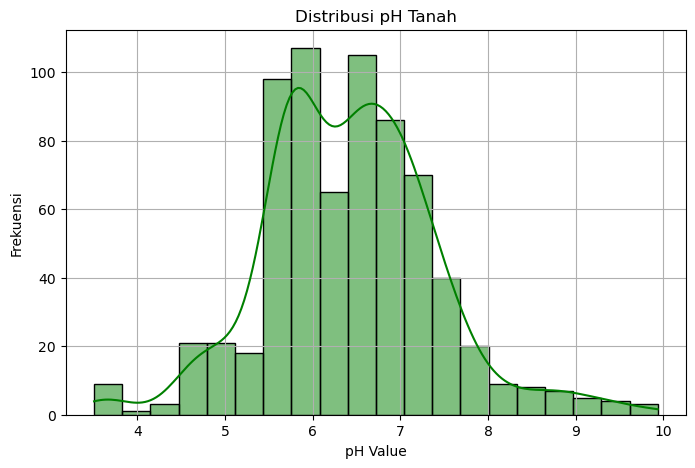

In [5]:
# Visualisasi Data

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribusi pH Tanah
plt.figure(figsize=(8, 5))
sns.histplot(data['pH_Value'], kde=True, bins=20, color='green')
plt.title("Distribusi pH Tanah")
plt.xlabel("pH Value")
plt.ylabel("Frekuensi")
plt.grid()
plt.show()

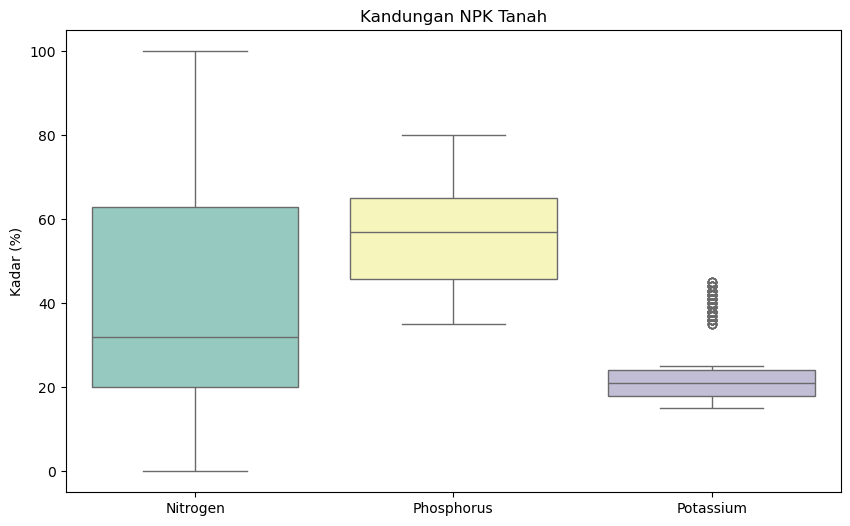

In [6]:
# 2. Distribusi Nitrogen, Fosfor, dan Kalium
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Nitrogen', 'Phosphorus', 'Potassium']], palette="Set3")
plt.title("Kandungan NPK Tanah")
plt.ylabel("Kadar (%)")
plt.show()

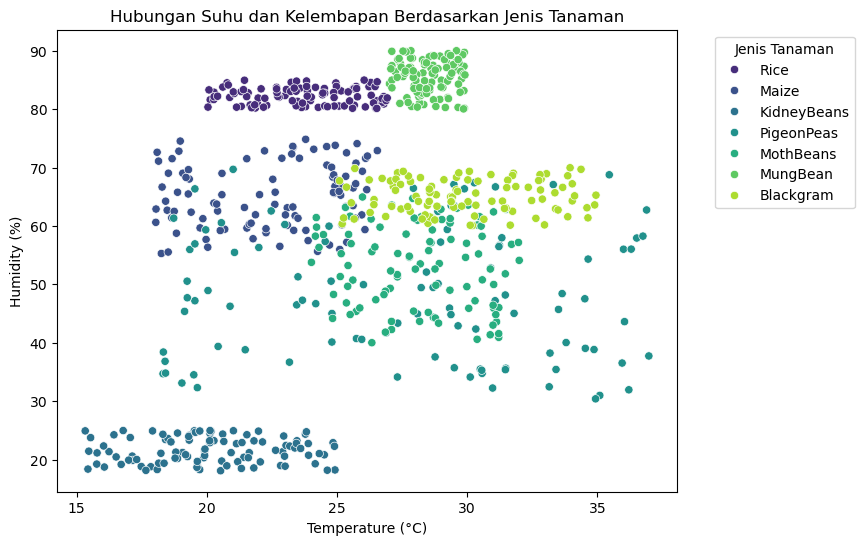

In [7]:
# 3. Hubungan Suhu dan Kelembapan
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Humidity', hue='Crop', data=data, palette='viridis')
plt.title("Hubungan Suhu dan Kelembapan Berdasarkan Jenis Tanaman")
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.legend(title="Jenis Tanaman", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

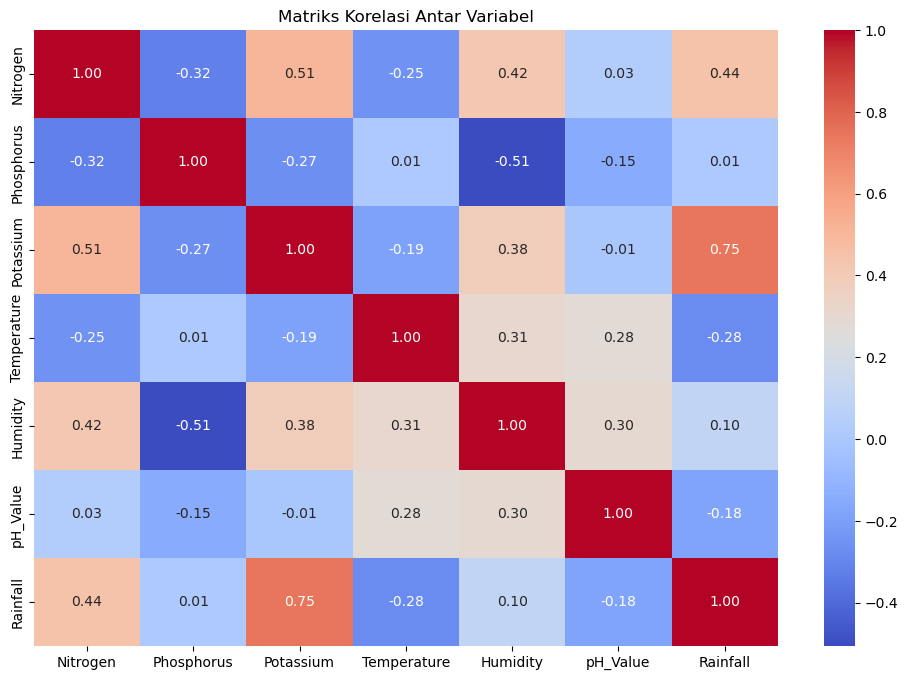

In [8]:
# 4. Korelasi Antar Variabel Numerik
plt.figure(figsize=(12, 8))
correlation_matrix = data[['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi Antar Variabel")
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_7296\901037038.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Crop', y='Rainfall', data=data, palette="husl")


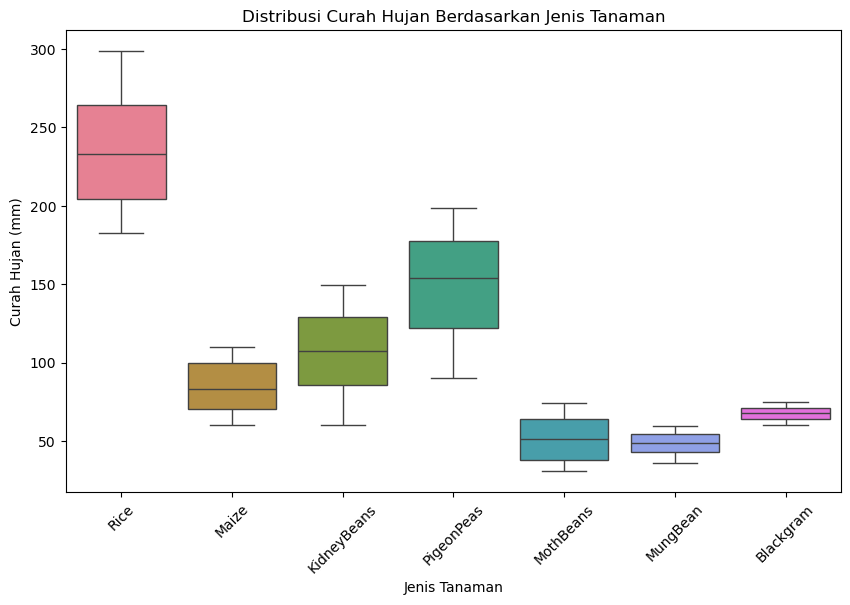

In [9]:
# 5. Distribusi Curah Hujan Berdasarkan Jenis Tanaman
plt.figure(figsize=(10, 6))
sns.boxplot(x='Crop', y='Rainfall', data=data, palette="husl")
plt.title("Distribusi Curah Hujan Berdasarkan Jenis Tanaman")
plt.xlabel("Jenis Tanaman")
plt.ylabel("Curah Hujan (mm)")
plt.xticks(rotation=45)
plt.show()

In [10]:
# Discretisasi nilai Rainfall menjadi interval (Rendah, Sedang, Tinggi)
bins = [0, 100, 200, 300]  # Batasan interval
labels = ['Rendah', 'Sedang', 'Tinggi']
data['Rainfall_Category'] = pd.cut(data['Rainfall'], bins=bins, labels=labels, include_lowest=True)

In [11]:
# Mengevaluasi kelengkapan data
missing_values = data.isnull().sum()
print("Jumlah missing values per kolom:")
print(missing_values)

Jumlah missing values per kolom:
Nitrogen             0
Phosphorus           0
Potassium            0
Temperature          0
Humidity             0
pH_Value             0
Rainfall             0
Crop                 0
Rainfall_Category    0
dtype: int64


In [12]:
# Mengecek data duplikat
duplicates = data.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")

Jumlah data duplikat: 0


In [13]:
from sklearn.preprocessing import LabelEncoder

# Jika target adalah 'Crop' dan bersifat kategorikal, kita encoding
if 'Crop' in data.columns:
    le = LabelEncoder()
    data['Crop_Encoded'] = le.fit_transform(data['Crop'])
    print("\nLabel Encoding Target Variabel:")
    print(data['Crop_Encoded'].value_counts())

# Pisahkan fitur dan target
feature_columns = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']
X = data[feature_columns]
y = data['Crop_Encoded']

num_classes = len(le.classes_)
print("Mapping dari angka ke nama tanaman:")
for idx, name in enumerate(le.classes_):
    print(f"{idx}: {name}")


Label Encoding Target Variabel:
Crop_Encoded
6    100
2    100
1    100
5    100
3    100
4    100
0    100
Name: count, dtype: int64
Mapping dari angka ke nama tanaman:
0: Blackgram
1: KidneyBeans
2: Maize
3: MothBeans
4: MungBean
5: PigeonPeas
6: Rice


# Training and Testing

In [15]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Load data
data = pd.read_csv("dataset.csv")

# Fitur dan target
features = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']
target = 'Crop'

# Standarisasi fitur
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Encode target variabel menggunakan LabelEncoder
label_encoder = LabelEncoder()
data['Crop_Encoded'] = label_encoder.fit_transform(data[target])
num_classes = len(label_encoder.classes_)  # Jumlah kelas unik dalam target

# Pisahkan fitur dan target
X = data[features]
y = data['Crop_Encoded']

# Membagi dataset menjadi train dan test (80% dan 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ubah y ke dalam format one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# Konversi data ke TensorFlow Dataset untuk mempermudah pelatihan
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# Batch dan prefetch untuk optimasi performa
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Output ukuran data untuk debugging
print(f"Jumlah data training: {X_train.shape[0]} baris")
print(f"Jumlah data testing: {X_test.shape[0]} baris")

# Cetak hasil encoding untuk validasi
print("\nMapping dari angka ke nama tanaman:")
for idx, name in enumerate(label_encoder.classes_):
    print(f"{idx}: {name}")


Jumlah data training: 560 baris
Jumlah data testing: 140 baris

Mapping dari angka ke nama tanaman:
0: Blackgram
1: KidneyBeans
2: Maize
3: MothBeans
4: MungBean
5: PigeonPeas
6: Rice


In [16]:
# Simpan data training dan testing ke CSV
train_data = pd.DataFrame(X_train, columns=features)
train_data[target] = y_train.argmax(axis=1)  # Mengembalikan one-hot encoding ke format integer

test_data = pd.DataFrame(X_test, columns=features)
test_data[target] = y_test.argmax(axis=1)

# Tentukan path untuk menyimpan file
train_file_path = os.path.join(os.getcwd(), "train.csv")
test_file_path = os.path.join(os.getcwd(), "test.csv")

# Simpan ke file CSV
train_data.to_csv(train_file_path, index=False)
test_data.to_csv(test_file_path, index=False)

# Output lokasi penyimpanan
print(f"Data training disimpan di: {train_file_path}")
print(f"Data testing disimpan di: {test_file_path}")

Data training disimpan di: C:\Users\Asus\Documents\MSIB\Capstone\train.csv
Data testing disimpan di: C:\Users\Asus\Documents\MSIB\Capstone\test.csv


In [17]:
# Membuat model dengan 7 input features
model = tf.keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer sesuai jumlah fitur
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Output layer dengan softmax
])

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Melatih model
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=test_dataset,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

# Output ringkasan model
model.summary()


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.2724 - loss: 1.8300 - val_accuracy: 0.7786 - val_loss: 1.4221
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7580 - loss: 1.3757 - val_accuracy: 0.9500 - val_loss: 0.9656
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8953 - loss: 0.9150 - val_accuracy: 0.9571 - val_loss: 0.5115
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9597 - loss: 0.5021 - val_accuracy: 0.9786 - val_loss: 0.2434
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9757 - loss: 0.2559 - val_accuracy: 0.9857 - val_loss: 0.1392
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9839 - loss: 0.1367 - val_accuracy: 0.9857 - val_loss: 0.1050
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9835 - loss: 0.1057 - val_accuracy: 0.9857 - val_loss: 0.0827
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9901 - loss: 0.0683 - val_accuracy: 0.9857 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,775 (135.84 KB)

 Trainable params: 11,591 (45.28 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,184 (90.57 KB)

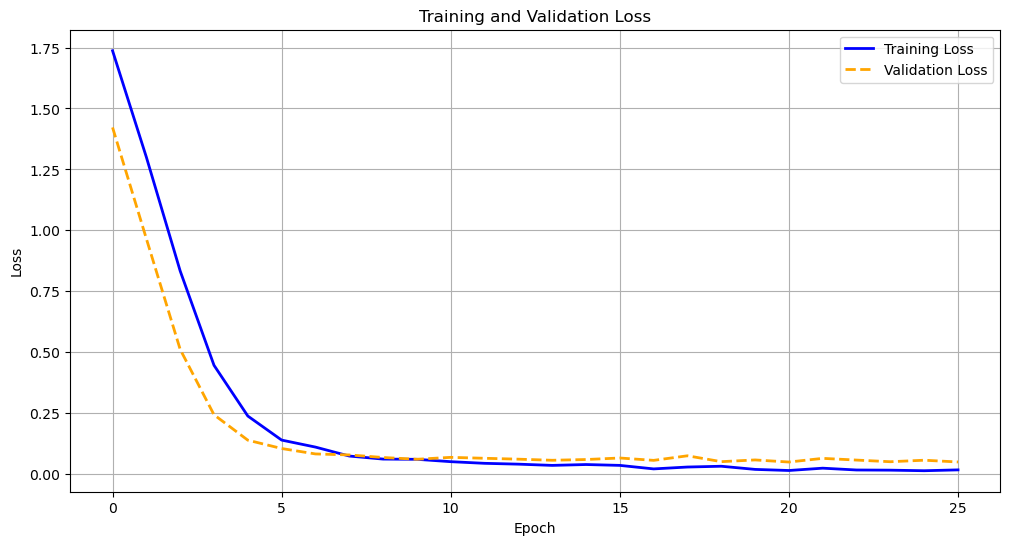

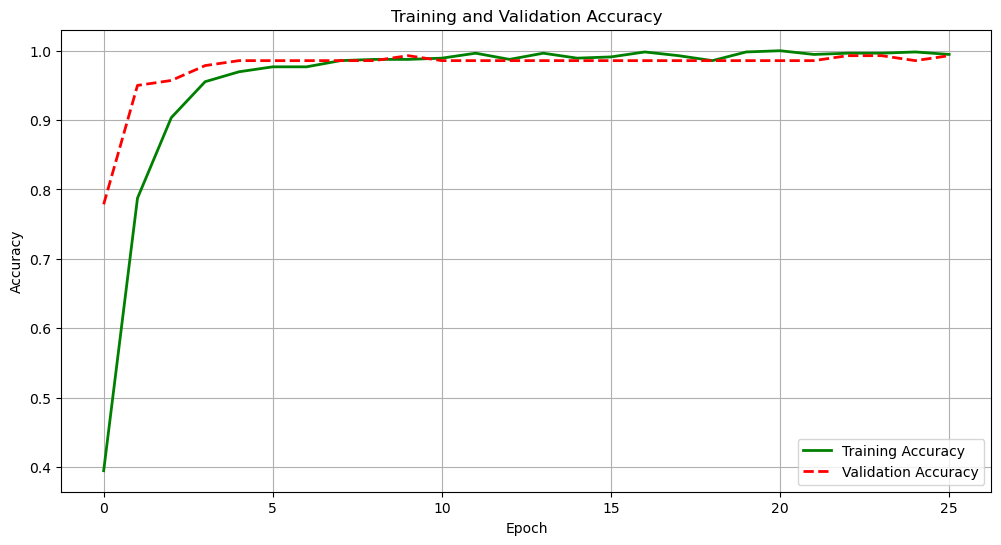

In [18]:
import matplotlib.pyplot as plt

def plot_evaluation(history):
    # Plot Loss (Training vs Validation)
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--', linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Accuracy (Training vs Validation)
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='green', linewidth=2)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', linestyle='--', linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Panggil fungsi dengan history model
plot_evaluation(history)

In [19]:
# Menyimpan model
saved_model_path = "./my_model.h5"

# Memastikan direktori tempat menyimpan model sudah ada
os.makedirs(os.path.dirname(saved_model_path), exist_ok=True)

# Menyimpan model
model.save(saved_model_path)

print(f"Model saved as {saved_model_path}")

Model saved as ./my_model.h5


# Convert Tensorflow Lite

In [21]:
# Convert to TFLite model
model = tf.keras.models.load_model('my_model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

tflite_model_file = 'model.tflite'
with open(tflite_model_file, 'wb') as f:
    f.write(tflite_model)

print(f"Model successfully saved to {tflite_model_file}")

INFO:tensorflow:Assets written to: C:\Users\Asus\AppData\Local\Temp\tmpg5_fzqb8\assets


INFO:tensorflow:Assets written to: C:\Users\Asus\AppData\Local\Temp\tmpg5_fzqb8\assets


Saved artifact at 'C:\Users\Asus\AppData\Local\Temp\tmpg5_fzqb8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 7), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  1560818154192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1560818154576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1560879187728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1560879189072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1560818141520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1560879190224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1560879189840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1560879190992: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model successfully saved to model.tflite


In [22]:
# Select mode of optimization
mode = "Speed" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

# Optimizing Model

In [24]:
# Konversi dengan optimasi tambahan di TFLite
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Simpan model yang sudah dioptimasi
tflite_model_file = 'optimized_model.tflite'
with open(tflite_model_file, 'wb') as f:
    f.write(tflite_model)
    
print(f"Optimized TFLite model successfully saved to {tflite_model_file}")

INFO:tensorflow:Assets written to: C:\Users\Asus\AppData\Local\Temp\tmpc298a1de\assets


INFO:tensorflow:Assets written to: C:\Users\Asus\AppData\Local\Temp\tmpc298a1de\assets


Saved artifact at 'C:\Users\Asus\AppData\Local\Temp\tmpc298a1de'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 7), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  1560818154192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1560818154576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1560879187728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1560879189072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1560818141520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1560879190224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1560879189840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1560879190992: TensorSpec(shape=(), dtype=tf.resource, name=None)
Optimized TFLite model successfully saved to optimized_model.tflite
